# 🇰🇷 한국 복지 패널 데이터 분석
실제 설문조사 데이터를 가지고 우리나라 사람들의 삶을 분석해봅시다.
SPSS 통계 프로그램 전용 파일을 불러와서 작업할 거예요.



SPASS 파일을 읽기 위한 라이브러리 설치
1. pip install pyreadstat

In [42]:
# 기본 라이브러리 호출
import pandas as pd
import numpy as np

# 시각화 라이브러리 호출
import matplotlib.pyplot as plt # 기본시각화
import seaborn as sns           # 고급시각화

## 1. 데이터 불러오기
`pd.read_spss`를 사용해서 데이터를 읽어옵니다.


In [43]:
# 한국복지패널 제19차 가구원 데이터 SPSS형식에서 불러온다.
df = pd.read_spss("./content/koweps_hpc19_2024_beta1.sav")
df.head() # 데이터프레임 확인 상위 5개

,h19_id,h19_ind,h19_sn,h19_merkey,h_new,h_new1,h19_cobf,p19_wsc,p19_wsl,p19_wgc,...,c1907_4aq19,c1907_4aq20,c1907_4aq21,c1907_4aq22,c1907_4aq23,h19_pers_income1,h19_pers_income2,h19_pers_income3,h19_pers_income4,h19_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,0.0,NaN,0.266048,0.268809,1441.082985,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,0.0,NaN,0.434904,0.411083,2355.716918,...,NaN,NaN,NaN,NaN,NaN,NaN,2379.0,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,0.0,NaN,0.236213,0.223306,1279.478960,...,NaN,NaN,NaN,NaN,NaN,NaN,720.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,0.0,NaN,0.554892,0.506558,3005.647871,...,NaN,NaN,NaN,NaN,NaN,3240.0,NaN,NaN,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,0.0,NaN,0.848891,0.828363,4598.133895,...,NaN,NaN,NaN,NaN,NaN,NaN,951.0,NaN,10.0,NaN


## 2. 데이터 복사하기
원본 데이터는 소중하니까, 복사본(`copy`)을 만들어서 분석해요.


In [44]:
raw_data = df.copy() # 원본데이터 보존을 위한 복사본 생성

In [45]:
df.info() # 데이터프레임 구조외 변수별 요약 정보 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15422 entries, 0 to 15421
Columns: 1046 entries, h19_id to h19_pers_income5
dtypes: float64(1045), object(1)
memory usage: 123.1+ MB


In [46]:
df.columns # 데이터프레임에 포함된 모든 컬럼명(변수명) 확인

Index(['h19_id', 'h19_ind', 'h19_sn', 'h19_merkey', 'h_new', 'h_new1',
       'h19_cobf', 'p19_wsc', 'p19_wsl', 'p19_wgc',
       ...
       'c1907_4aq19', 'c1907_4aq20', 'c1907_4aq21', 'c1907_4aq22',
       'c1907_4aq23', 'h19_pers_income1', 'h19_pers_income2',
       'h19_pers_income3', 'h19_pers_income4', 'h19_pers_income5'],
      dtype='object', length=1046)

In [47]:
# 성별, 출생연도, 월평균임금, 직업
df[['h19_g3', 'h19_g4', 'p1902_8aq1', 'h19_eco9']]

,h19_g3,h19_g4,p1902_8aq1,h19_eco9
0,2.0,1945.0,NaN,NaN
1,1.0,1948.0,183.0,942.0
2,1.0,1942.0,NaN,782.0
3,1.0,1962.0,270.0,855.0
4,2.0,1963.0,33.0,421.0
...,...,...,...,...
15417,1.0,1975.0,1010.0,222.0
15418,2.0,1976.0,260.0,313.0
15419,2.0,2009.0,NaN,NaN
15420,1.0,1964.0,NaN,248.0


In [48]:
df.describe() # 수치형 변수(숫자형 컬럼)의 통계 요약 정보 확인

,h19_id,h19_ind,h19_sn,h19_merkey,h_new,h_new1,h19_cobf,p19_wsc,p19_wsl,p19_wgc,...,c1907_4aq19,c1907_4aq20,c1907_4aq21,c1907_4aq22,c1907_4aq23,h19_pers_income1,h19_pers_income2,h19_pers_income3,h19_pers_income4,h19_pers_income5
count,15422.000000,15422.000000,15422.000000,1.542200e+04,15422.000000,15422.000000,138.000000,9547.000000,9547.000000,9547.000000,...,330.000000,330.000000,330.000000,330.000000,330.000000,2844.000000,4107.000000,1075.000000,15422.000000,896.000000
mean,6101.584555,7.012450,1.005771,6.101655e+07,0.154195,0.226754,2.181159,1.000000,1.000000,5416.635487,...,2.915152,1.909091,1.803030,1.721212,2.921212,4954.102321,1664.679571,4162.537674,4.250940,1306.699777
std,3627.634224,6.766716,0.143259,3.627682e+07,0.361148,0.418746,1.617584,0.667145,0.726814,3613.678770,...,0.722256,0.793731,0.731815,0.676014,0.710220,2940.527076,1661.234908,5478.355826,65.450626,2351.891839
min,2.000000,1.000000,1.000000,2.010100e+04,0.000000,0.000000,1.000000,0.009622,0.000000,52.117115,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-28564.000000,-148.000000,-11990.000000
25%,2969.000000,1.000000,1.000000,2.969010e+07,0.000000,0.000000,1.000000,0.483828,0.446592,2620.719401,...,2.000000,1.000000,1.000000,1.000000,3.000000,3050.000000,300.000000,1422.000000,0.000000,225.750000
50%,5676.500000,5.000000,1.000000,5.676540e+07,0.000000,0.000000,2.000000,0.921310,0.845038,4990.402553,...,3.000000,2.000000,2.000000,2.000000,3.000000,4190.000000,1196.000000,3000.000000,0.000000,532.000000
75%,9541.500000,17.000000,1.000000,9.541570e+07,0.000000,0.000000,2.000000,1.381663,1.394530,7483.966844,...,3.000000,2.000000,2.000000,2.000000,3.000000,6233.000000,2520.000000,5303.500000,0.000000,1362.250000
max,12011.000000,19.000000,9.000000,1.201117e+08,1.000000,1.000000,7.000000,3.640399,2.945577,19718.713804,...,4.000000,4.000000,4.000000,4.000000,4.000000,25168.000000,27144.000000,65000.000000,4000.000000,22000.000000


## 3. 변수명 바꾸기
데이터의 이름이 어렵게 되어 있다면, 우리가 알기 쉬운 이름으로 바꿔줍니다.


In [49]:
# 주요 변수명을 보기 좋게 변경
data = df.rename(columns={
    'h19_g3': 'sex',
    'h19_g4': 'birth',
    'p1902_8aq1': 'income',
    'h19_eco9': 'job_code'
})

data = data[['sex', 'birth', 'income', 'job_code']]

# 데이터프레임 확인
data.head()


,sex,birth,income,job_code
0,2.0,1945.0,NaN,NaN
1,1.0,1948.0,183.0,942.0
2,1.0,1942.0,NaN,782.0
3,1.0,1962.0,270.0,855.0
4,2.0,1963.0,33.0,421.0


In [50]:
# data의 기초 통계 요약 확인
data.describe()

,sex,birth,income,job_code
count,15422.000000,15422.000000,5501.000000,8015.000000
mean,1.552004,1969.943587,297.934921,590.945228
std,0.497304,24.171551,230.994026,269.377681
min,1.000000,1906.000000,0.000000,111.000000
25%,1.000000,1949.000000,144.000000,313.000000
50%,2.000000,1966.000000,257.000000,611.000000
75%,2.000000,1989.000000,393.000000,873.000000
max,2.000000,2023.000000,2097.000000,1009.000000


In [51]:
# 성별 변수에 어떤 값들이 있는지 확인 (unique함수는 범주형에 사용)
data['job_code'].unique()

array([  nan,  942.,  782.,  855.,  421.,  941.,  151.,  254.,  399.,
        510.,  521.,  783.,  313.,  952.,  951.,  531.,  873.,  121.,
        992.,  842.,  999.,  852.,  930.,  312.,  273.,  799.,  991.,
        422.,  710.,  285.,  223.,  441.,  761.,  235.,  246.,  149.,
        953.,  863.,  314.,  910.,  792.,  771.,  875.,  411.,  247.,
        311.,  222.,  153.,  259.,  252.,  721.,  862.,  741.,  152.,
        753.,  392.,  320.,  141.,  274.,  442.,  762.,  330.,  245.,
        135.,  611.,  532.,  522.,  243.,  730.,  231.,  722.,  281.,
        248.,  832.,  159.,  133.,  891.,  224.,  431.,  922.,  139.,
        391.,  261.,  286.,  811.,  211.,  234.,  772.,  284.,  221.,
        232.,  225.,  122.,  112.,  251.,  239.,  282.,  131.,  236.,
        429.,  921.,  213.,  752.,  288.,  784.,  432.,  283.,  111.,
        412.,  812.,  823.,  233., 1002.,  892.,  134.,  132.,  253.,
        743.,  864.,  874.,  751.,  851.,  831.,  854.,  899.,  781.,
        841.,  612.,

### 🔍 결측치(빈 값) 확인
혹시 비어있는 데이터가 있는지 확인하고 처리해요.


In [52]:
# 성별의 결측치 갯수 확인
data['sex'].isnull().sum()

np.int64(0)

### 📊 데이터 확인하기
각 항목별로 응답한 사람이 몇 명인지 세어봅니다.


In [53]:
# 성별의 변수와 값별 빈도수 확인
data['sex'].value_counts()


sex
2.0    8513
1.0    6909
Name: count, dtype: int64

In [54]:
# 성별 컬럼 값이 1.0이면 'M', 그렇지 않으면 'F'로 변경
data['sex'] = np.where(data['sex'] == 1.0, 'M', 'F')

data.head()

,sex,birth,income,job_code
0,F,1945.0,NaN,NaN
1,M,1948.0,183.0,942.0
2,M,1942.0,NaN,782.0
3,M,1962.0,270.0,855.0
4,F,1963.0,33.0,421.0


<Axes: xlabel='sex', ylabel='count'>

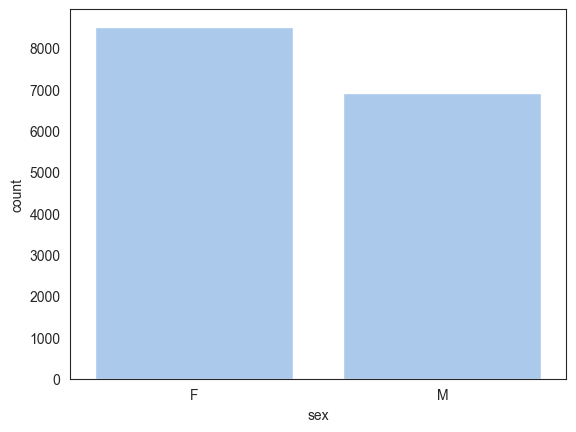

In [55]:
# 시각화 스타일 설정
sns.set_style('white')       # 배경: 화이트
sns.set_palette('pastel')   # 톤: 파스텔톤

sns.countplot(data=data, x='sex') # 분포 확인용




In [56]:
# 소득(월 평균 임금)의 기초 통계
data['income'].describe()

count    5501.000000
mean      297.934921
std       230.994026
min         0.000000
25%       144.000000
50%       257.000000
75%       393.000000
max      2097.000000
Name: income, dtype: float64

<Axes: xlabel='income', ylabel='Count'>

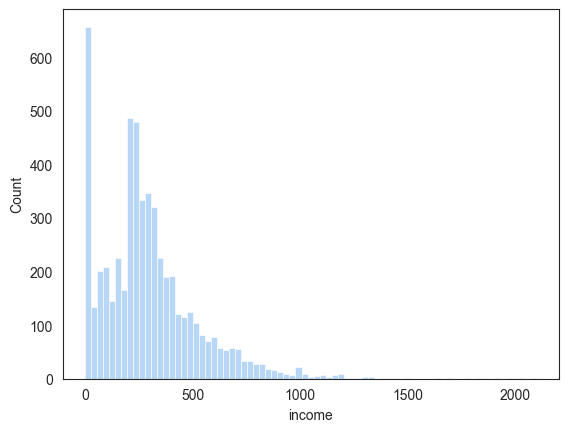

In [57]:
# 소득 분포를 히스토그램으로 시각화
sns.histplot(data=data, x='income')

### 🔍 결측치(빈 값) 확인
혹시 비어있는 데이터가 있는지 확인하고 처리해요.


In [58]:
# 소득의 결측치 확인
data['income'].isnull().sum()

np.int64(9921)

## 📈 결과 시각화
분석한 내용을 그래프로 그려서 한눈에 파악해봐요.


In [59]:
# 폰트 및 마이너스 깨짐 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

### 🔍 결측치(빈 값) 확인
혹시 비어있는 데이터가 있는지 확인하고 처리해요.


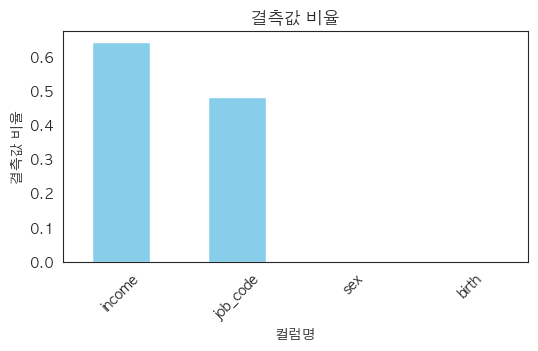

In [ ]:
# 변수별 결측 비율
# 각 컬럼의 결측값 비율 계산 후 내림차순 정렬
na_rate = data.isnull().mean().sort_values(ascending=False)
plt.figure(figsize=(6, 3))                 # 그래프 크기 설정
na_rate.plot(kind='bar', color='skyblue')  # 결측비율로 막대그래프 생성
plt.title('결측값 비율')
plt.xlabel('컬럼명')
plt.ylabel('결측값 비율')
plt.xticks(rotation=45)                    # x축 라벨 회전 각도
plt.show()

### 🔍 결측치(빈 값) 확인
혹시 비어있는 데이터가 있는지 확인하고 처리해요.


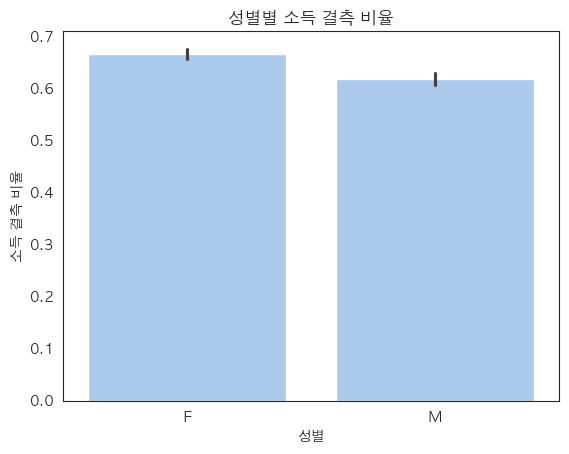

In [63]:
# 성별별 소득의 결측 비율
    # income 결측 여부를 True/False로 나타낸다.
temp = data.assign(income_missing=data['income'].isnull())
    # 성별별 소득의 결측 비율
sns.barplot(x='sex', y='income_missing', data=temp)
plt.xlabel('성별')
plt.ylabel('소득 결측 비율')
plt.title('성별별 소득 결측 비율')
plt.show()

## 4. 그룹별 분석
성별, 나이대, 지역 등 그룹별로 나누어 평균이나 합계를 구해봅니다.


In [64]:
# 성별 평균 소득 계산
sex_income = data.dropna(subset=['income']) # 소득에 결측치가 있는 행 제거
sex_income.groupby('sex')['income'].mean()  # 성별별 평균 소득 계산
sex_income

,sex,birth,income,job_code
1,M,1948.0,183.0,942.0
3,M,1962.0,270.0,855.0
4,F,1963.0,33.0,421.0
7,F,1940.0,27.0,941.0
9,F,1992.0,20.0,254.0
...,...,...,...,...
15410,F,1977.0,417.0,153.0
15413,M,1976.0,250.0,151.0
15414,F,1977.0,125.0,312.0
15417,M,1975.0,1010.0,222.0


## 📈 결과 시각화
분석한 내용을 그래프로 그려서 한눈에 파악해봐요.


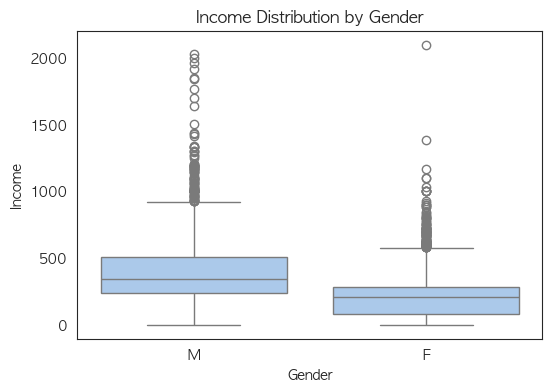

In [65]:
# 성별별 소득의 이상치 확인 (Boxplot)
temp = data.dropna(subset=['income']) # 소득 결측치 제외한 데이터를 temp에 저장
plt.figure(figsize=(6, 4))
sns.boxplot(x='sex', y='income', data=temp)
plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Income')
plt.show()

In [66]:
# T-Test를 통해 성별 소득 차이의 통계적 유의성 검정
import scipy.stats as stats

# 남성과 여성 데이터를 추출하고, 결측치 제거
sex_m = data[data['sex'] == 'M'].dropna()
sex_f = data[data['sex'] == 'F'].dropna()

stats.ttest_ind(sex_m['income'], sex_f['income'], equal_var=True) # 독립표본 t-검정 수행

TtestResult(statistic=np.float64(31.41661395534693), pvalue=np.float64(2.0843900997695778e-199), df=np.float64(5499.0))

In [ ]:
# 출생연도 변수의 통계요약 정보
data['birth'].describe()

count    15422.000000
mean      1969.943587
std         24.171551
min       1906.000000
25%       1949.000000
50%       1966.000000
75%       1989.000000
max       2023.000000
Name: birth, dtype: float64

<Axes: xlabel='birth', ylabel='Count'>

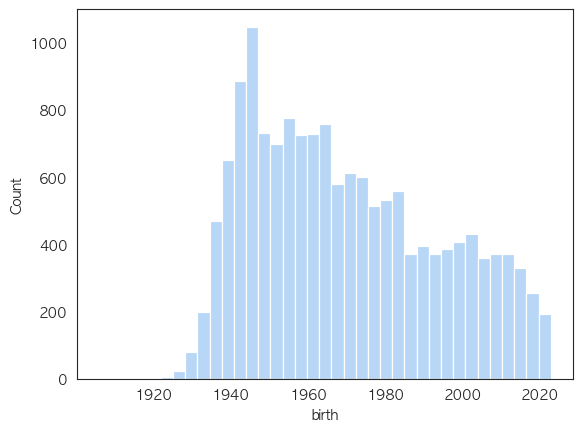

In [68]:
# 출생연도 분포를 히스토그램으로 시각화
sns.histplot(data=data, x='birth')

In [69]:
data['age'] =2025 - data['birth'] # 2025년 기준으로 나이 계산

In [79]:
# 나이를 정수형으로 변환
data['age'] = data['age'].astype('int')


## 4. 그룹별 분석
성별, 나이대, 지역 등 그룹별로 나누어 평균이나 합계를 구해봅니다.


<Axes: xlabel='age'>

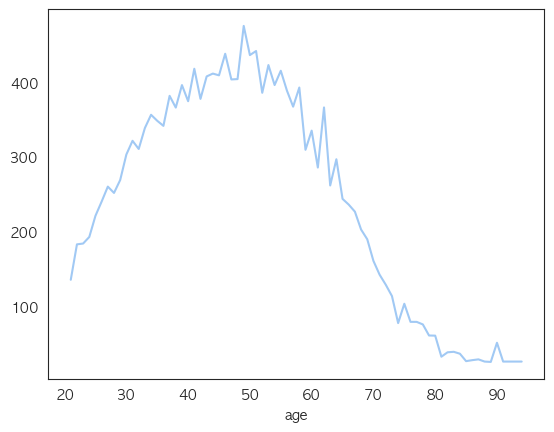

In [75]:
# 나이별 평균소득 시각화
data_income = data.dropna(subset=['income']) # 소득 결측치 제거

# 나이별 평균소득 계산
data_income = data_income.groupby('age')['income'].mean()

data_income.plot()

## 4. 그룹별 분석
성별, 나이대, 지역 등 그룹별로 나누어 평균이나 합계를 구해봅니다.


In [80]:
# 나이별 평균 소득이 가장 높은 나이
data_income.idxmax() # 가장 큰 값이 있는 index(나이로 groupby) 반환

np.int64(49)

In [81]:
# 나이별로 평균 소득을 내림차순 정렬
data_income.sort_values(ascending=False)

age
49    475.018349
51    441.511278
46    437.867257
50    436.088710
53    422.788136
         ...    
91     27.000000
92     27.000000
93     27.000000
94     27.000000
89     26.533333
Name: income, Length: 74, dtype: float64

In [84]:
# 나이를 기준으로 세가지 연령대 범주 지정
data = data.assign(
    # 30세 이하: 청년, 
    # 30세 이상 60세 이하: 중년, 
    # 60세 이상: 노년
    agetype=np.where(
        data['age'] < 30, 'youth',
        np.where(
            data['age'] < 60, 'middle age', 'senior'
        )
    )
)
data

,sex,birth,income,job_code,age,agetype
0,F,1945.0,NaN,NaN,80,senior
1,M,1948.0,183.0,942.0,77,senior
2,M,1942.0,NaN,782.0,83,senior
3,M,1962.0,270.0,855.0,63,senior
4,F,1963.0,33.0,421.0,62,senior
...,...,...,...,...,...,...
15417,M,1975.0,1010.0,222.0,50,middle age
15418,F,1976.0,260.0,313.0,49,middle age
15419,F,2009.0,NaN,NaN,16,youth
15420,M,1964.0,NaN,248.0,61,senior


<Axes: xlabel='agetype', ylabel='count'>

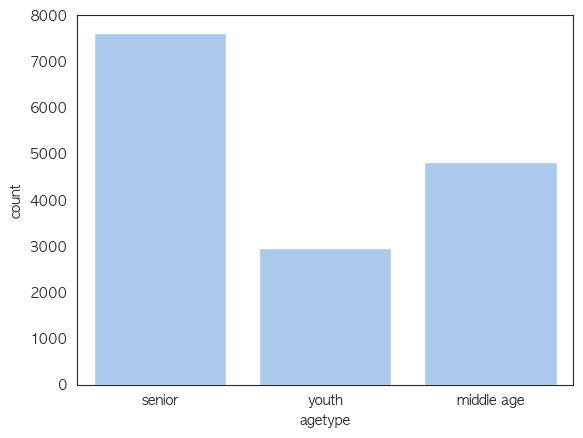

In [87]:
sns.countplot(data=data, x='agetype') # 연령대별 인원수 시각화

## 4. 그룹별 분석
성별, 나이대, 지역 등 그룹별로 나누어 평균이나 합계를 구해봅니다.


In [ ]:
# 연령대별 평균 소득 계산
#data.groupby('agetype')['income'].mean()

agetype
middle age    388.342483
senior        163.940803
youth         235.476891
Name: income, dtype: float64

## 4. 그룹별 분석
성별, 나이대, 지역 등 그룹별로 나누어 평균이나 합계를 구해봅니다.


In [90]:
# 연령대와 성별 조합으로 평균 소득 계산
data.groupby(['agetype', 'sex'])['income'].mean()

agetype     sex
middle age  F      288.949153
            M      470.311590
senior      F      110.974848
            M      246.579161
youth       F      229.501767
            M      244.238342
Name: income, dtype: float64

## 4. 그룹별 분석
성별, 나이대, 지역 등 그룹별로 나누어 평균이나 합계를 구해봅니다.


In [92]:
# 성별과 나이별 평균 소득 계산
age_sex = data.dropna(subset='income').groupby(['age', 'sex'], as_index=False)['income'].mean()

age_sex

,age,sex,income
0,21,F,117.909091
1,21,M,169.666667
2,22,F,164.111111
3,22,M,270.500000
4,23,F,163.363636
...,...,...,...
141,92,F,27.000000
142,92,M,27.000000
143,93,M,27.000000
144,94,F,27.000000


<Axes: xlabel='age', ylabel='income'>

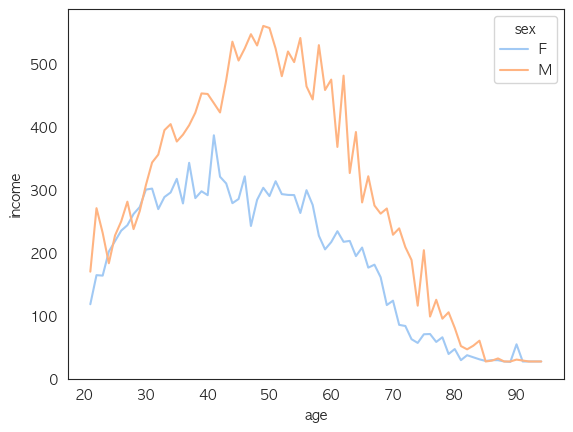

In [93]:
# 성별 x 나이별 평균 소득 시각화
sns.lineplot(data=age_sex, x='age', y='income', hue='sex')

In [95]:
len(data['job_code'].unique()) # 직업코드의 고유값 개수 (unique로 중복 제거)

154

## 3. 변수명 바꾸기
데이터의 이름이 어렵게 되어 있다면, 우리가 알기 쉬운 이름으로 바꿔줍니다.


In [96]:
# 직업코드 시트에서 직업명 매핑 테이블 불러오기
job_name = pd.read_excel('./content/(2024년 19차 한국복지패널조사) 조사설계서-가구용(beta1).xlsx', sheet_name="직종코드(2019 신분류)")

job_name.rename(columns={
    "소분류": "job_code",
    "Unnamed: 3": "job"}, inplace=True)

job_name = job_name[['job_code', 'job']]
job_name


,job_code,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자
...,...,...
151,992,계기∙자판기 및 주차 관리 종사자
152,999,기타 서비스 관련 단순 종사자
153,1001,장교
154,1002,부사관


In [97]:
job_df = data.merge(job_name, how='left', on='job_code')
job_df

,sex,birth,income,job_code,age,agetype,job
0,F,1945.0,NaN,NaN,80,senior,NaN
1,M,1948.0,183.0,942.0,77,senior,건물 관리원 및 검표원
2,M,1942.0,NaN,782.0,83,senior,건설관련기능종사자
3,M,1962.0,270.0,855.0,63,senior,금속기계 부품 조립원
4,F,1963.0,33.0,421.0,62,senior,돌봄 및 보건 서비스 종사자
...,...,...,...,...,...,...,...
15417,M,1975.0,1010.0,222.0,50,middle age,컴퓨터 시스템 및 소프트웨어 전문가
15418,F,1976.0,260.0,313.0,49,middle age,회계 및 경리 사무원
15419,F,2009.0,NaN,NaN,16,youth,NaN
15420,M,1964.0,NaN,248.0,61,senior,종교 관련 종사자


## 4. 그룹별 분석
성별, 나이대, 지역 등 그룹별로 나누어 평균이나 합계를 구해봅니다.


In [100]:
# 직업별 평균 소득 계산
job_income_mean = job_df.dropna(subset=['job', 'income']) # 직업명과 소득이 모두 존재하는 행만 필터링

# 직업명을 기준으로 평균 소득 계산
job_income_mean = job_income_mean.groupby('job')['income'].mean()

job_income_mean

# 평균소득 상위 10개 확인
job_income_mean.sort_values(ascending=False).head(10)

job
기업 고위 임원               898.000000
의료 진료 전문가              862.500000
행정 전문가                 830.500000
컴퓨터 하드웨어 및 통신공학 전문가    784.200000
정보 통신 관련 관리자           756.333333
보험 및 금융 관리자            748.437500
장교                     717.250000
기계∙로봇공학 기술자 및 시험원      703.000000
행정 및 경영 지원 관리자         681.428571
법률 전문가                 673.800000
Name: income, dtype: float64

/opt/anaconda3/envs/data_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


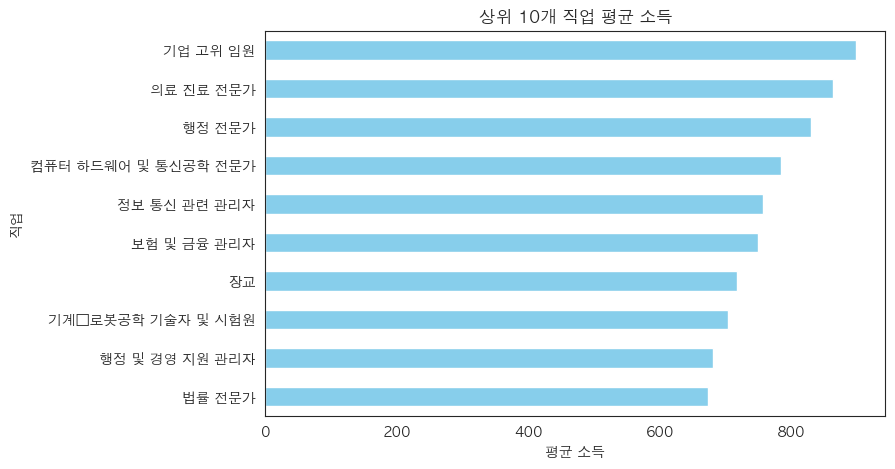

In [105]:
# 가로 막대 그래프 시각화
# 평균 소득 상위 10개 직업 추출 후, 그래프에서 보기 좋게 다시 오름차순으로 정렬
top10 = job_income_mean.sort_values(ascending=False).head(10).sort_values()
plt.figure(figsize=(8, 5))
top10.plot(kind='barh', color='skyblue')
plt.title('상위 10개 직업 평균 소득')
plt.xlabel('평균 소득')
plt.ylabel('직업')
plt.show()

## 📈 결과 시각화
분석한 내용을 그래프로 그려서 한눈에 파악해봐요.


/opt/anaconda3/envs/data_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


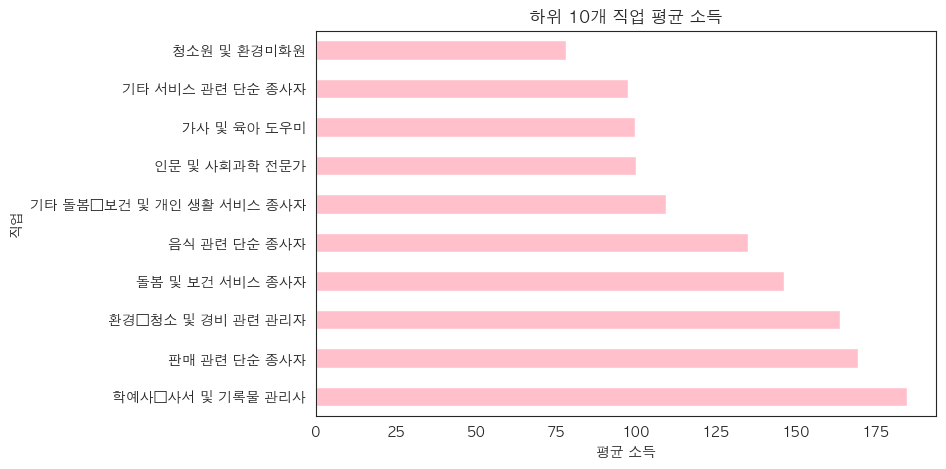

In [112]:
bot10 = job_income_mean.sort_values(ascending=False).tail(10)
# bot10
plt.figure(figsize=(8, 5))
bot10.plot(kind='barh', color='pink')
plt.title('하위 10개 직업 평균 소득')
plt.xlabel('평균 소득')
plt.ylabel('직업')
plt.show()